# Analyze the advertising channels of the Procrastinate Pro+ application

# Table of Contents 

* [Introduction](#num1)
* [Data description](#num2)
* [1. Data loading and processing](#num3)
* [2. Exploratory data analysis](#num4)
* [3. Marketing](#num5)
* [4. Estimating the return on advertising](#num6)
* [5. General conclusion](#num7)

<a id="num1"></a>
## Introduction

**This project analyzes the losses of the entertainment app Procrastinate Pro+.**

There is data about users attracted from May 1 to October 27, 2019:

1. server log with data about their visits,
2. download of their purchases for this period,
3. advertising costs.

It is necessary to investigate:

1. where users come from and what devices they use,
2. how much it costs to attract users from different advertising channels;
3. how much money each customer brings,
4. when the cost of attracting a customer pays off,
5. what factors are hindering customer acquisition.

<a id="num2"></a>
## Data description

**Структура visits_info_short.csv:**

*`User Id`* — уникальный идентификатор пользователя,

*`Region`* — страна пользователя,

*`Device`* — тип устройства пользователя,

*`Channel`* — идентификатор источника перехода,

*`Session Start`* — дата и время начала сессии,

*`Session End`* — дата и время окончания сессии.


**Структура orders_info_short.csv:**

*`User Id`* — уникальный идентификатор пользователя,

*`Event Dt`* — дата и время покупки,

*`Revenue`* — сумма заказа.


**Структура costs_info_short.csv:**

*`dt`* — дата проведения рекламной кампании,

*`Channel`* — идентификатор рекламного источника,

*`costs`* — расходы на эту кампанию.

<a id="num3"></a>
## 1. Data loading and processing

In [1]:
# Importing necessary modules
import pandas as pd # For data manipulation and analysis
import numpy as np # For mathematical computations
from datetime import datetime, timedelta # For working with dates and times
from matplotlib import pyplot as plt # For data visualization

In [2]:
# Load data into pandas dataframes from CSV files
visits = pd.read_csv('visits_info_short.csv')  # Dataset containing information about visits
orders = pd.read_csv('orders_info_short.csv')  # Dataset containing information about orders
costs = pd.read_csv('costs_info_short.csv')  # Dataset containing information about advertising costs

In [3]:
# Convert the 'Session Start' and 'Session End' columns in the visits dataframe to DateTime data type
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])

# Convert the 'Event Dt' column in the orders dataframe to DateTime data type
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])

# Convert the 'dt' column in the costs dataframe to DateTime data type and keep only the date part
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [4]:
# Rename the column names using lower case and underscore for better readability
visits.rename(columns={
    'User Id': 'user_id', 
    'Region': 'region',
    'Device': 'device',
    'Channel': 'channel',
    'Session Start': 'session_start',
    'Session End': 'session_end'}, inplace=True)

orders.rename(columns={
    'User Id': 'user_id', 
    'Event Dt': 'event_dt',
    'Device': 'device',
    'Revenue': 'revenue'}, inplace=True)

costs.rename(columns={
    'Channel': 'channel'}, inplace=True)

In [5]:
# Checking the 'visits' DataFrame for duplicates
visits_duplicates = visits.duplicated()
print(f'Number of duplicate rows in "visits" DataFrame: {visits_duplicates.sum()}')

# Checking the 'orders' DataFrame for duplicates
orders_duplicates = orders.duplicated()
print(f'Number of duplicate rows in "orders" DataFrame: {orders_duplicates.sum()}')

# Checking the 'costs' DataFrame for duplicates
costs_duplicates = costs.duplicated()
print(f'Number of duplicate rows in "costs" DataFrame: {costs_duplicates.sum()}')

Number of duplicate rows in "visits" DataFrame: 0
Number of duplicate rows in "orders" DataFrame: 0
Number of duplicate rows in "costs" DataFrame: 0


In [6]:
# Check for missing values in 'visits' DataFrame
print('Missing values in "visits" DataFrame:\n', visits.isna().sum())

# Check for missing values in 'orders' DataFrame
print('Missing values in "orders" DataFrame:\n', orders.isna().sum())

# Check for missing values in 'costs' DataFrame
print('Missing values in "costs" DataFrame:\n', costs.isna().sum())

Missing values in "visits" DataFrame:
 user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
Missing values in "orders" DataFrame:
 user_id     0
event_dt    0
revenue     0
dtype: int64
Missing values in "costs" DataFrame:
 dt         0
channel    0
costs      0
dtype: int64


In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Conclusion:**

1. Visits Dataset: This dataset includes information about user visits. It includes 309,901 records with no missing or duplicate values. The dataset contains six columns including the user id, region, device, channel, session start time, and session end time.

2. Orders Dataset: This dataset holds information about orders made by users. It consists of 40,212 entries, also with no missing or duplicate entries. It has three columns - user id, event date/time, and revenue earned from that order.

3. Costs Dataset: This dataset presents information about advertising costs. It is the smallest of all datasets with 1800 entries, and like the other datasets, there are no missing or duplicate values. It includes data on the date, channel, and costs of advertising campaigns.

To recap, all three datasets are well-structured and clean with no missing or duplicate values. 

<a id="num4"></a>
## 2. Exploratory data analysis

**Create user profiles. Determine the minimum and maximum dates for attracting users.**

In [10]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

   # Finding the details of the first visits
    profiles = (
    sessions.sort_values(by=['user_id', 'session_start']) # Sorting the sessions by user_id and session_start
    .groupby('user_id') # Grouping by user_id
    .agg(
        {
            'session_start': 'first', # Fetching the first session_start
            'channel': 'first', # Fetching the first channel
            'device': 'first', # Fetching the first device
            'region': 'first', # Fetching the first region
        }
    )
    .rename(columns={'session_start': 'first_ts'}) # Renaming session_start column to first_ts
    .reset_index() # Resetting the index
    )

    # For cohort analysis, determining the date of the first visit
    # and the first day of the month in which that visit took place
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period('M')

    # Adding a payer feature
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # Counting the number of unique users
    # with the same source and attraction date
    new_users = (
    profiles.groupby(['dt', 'channel']) # Grouping by 'dt' and 'channel'
    .agg({'user_id': 'nunique'}) # Counting unique 'user_id'
    .rename(columns={'user_id': 'unique_users'}) # Renaming 'user_id' column to 'unique_users'
    .reset_index() # Resetting the index
    )

    # Merging advertising expenses and number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # Dividing advertising expenses by  number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # Adding the acquisition cost to user profiles
    profiles = profiles.merge(
    ad_costs[['dt', 'channel', 'acquisition_cost']],
    on=['dt', 'channel'],
    how='left',
    )

    # Acquisition cost of organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [11]:
# Create profiles using the defined function
profiles = get_profiles(visits, orders, costs)

# Define a specific date (datetime) as the observation point for analyzing the data
observation_date = datetime(2019, 11, 1).date()  # Analysis Date

# Define the number of days to consider for the analysis as an horizon
horizon_days = 14  # Analysis horizon 

# Extract the minimum and maximum recruitment dates from the profiles
display(profiles.agg({'dt': ['min', 'max']}))

# Calculate the maximum possible recruitment date considering the analysis horizon
max_analysis_date= observation_date - timedelta(days=horizon_days - 1)

# Output the maximum recruitment date
max_analysis_date

dt
min  2019-05-01
max  2019-10-27

datetime.date(2019, 10, 19)

**Conclusion:** The dates correspond to the terms of reference. 

1. The analysis horizon is 14 days.
2. Minimum date of user engagement: 2019.05.01.
3. Maximum date of user engagement taking into account the horizon: 2019.10.19.

**Let's find out from which countries users come to the app and which country accounts for the most paying users.**

In [12]:
# Aggregate 'user_id' and 'payer' columns by 'region'
share_paying_users = profiles.groupby('region').agg({'user_id': 'count', 'payer': 'sum'})

# Compute ratio of paying users for each region and convert it to percentage
share_paying_users['%'] = (100 * share_paying_users['payer'] / share_paying_users['user_id'])

# Sort DataFrame by percentage column in descending order
share_paying_users = share_paying_users.sort_values(by='%', ascending=False)

# Format percentage column to have 2 decimal places
share_paying_users['%'] = share_paying_users['%'].map('{:,.2f}'.format)

share_paying_users

user_id  payer     %
region                             
United States   100002   6902  6.90
Germany          14981    616  4.11
UK               17575    700  3.98
France           17450    663  3.80

**Conclusion:** 

1. The United States has the highest number of paying users with around 6.90% of total users contributing to the payments. The total user base from the United States is also significantly higher than other countries which indicates good market penetration in the United States.

2. Among the evaluated regions, Germany has the second highest percentage of paying users with 4.11% despite having a significantly smaller user base than the United States. This shows a higher conversion rate in Germany.

3. The United Kingdom (UK) and France, despite having comparable total user counts, show slightly lower percentages of paying users at 3.98% and 3.80% respectively.

**Let's find out what devices customers are using and which devices are preferred by paying users.**

In [13]:
# Group by device and compute the number of users and sum of payers for each
share_paying_users_d = profiles.groupby('device').agg({'user_id': 'count', 'payer': 'sum'})

# Compute the percentage of payers from the user count
share_paying_users_d['%'] = (100 * share_paying_users_d['payer'] / share_paying_users_d['user_id'])

# Sort by the calculated percentage in descending order
share_paying_users_d = share_paying_users_d.sort_values(by='%', ascending=False)

# Format the percentage column to two decimal places
share_paying_users_d['%'] = share_paying_users_d['%'].map('{:,.2f}'.format)

share_paying_users_d

user_id  payer     %
device                       
Mac        30042   1912  6.36
iPhone     54479   3382  6.21
Android    35032   2050  5.85
PC         30455   1537  5.05

**Conclusion:** 

1. "Mac" and "iPhone" devices have the highest percentage of paying users, approximately 6.36% and 6.21% respectively. This could suggest that users with Apple devices might generally be more willing to make purchases, or the user experience on these devices leads to more conversions.

2. "Android" devices have a slightly lower paying user percentage, standing at about 5.85%. Despite having a larger user base than "Mac" devices, the fraction of paying users on the Android platform is lesser.

3. Among the observed segments, "PC" devices show the lowest conversion rate, with only about 5.05% of the users being payers.

From these insights, it's clear that device type plays a significant role in conversion rates. Businesses may want to investigate further into the user experiences on different platforms. 

**Examine advertising sources of engagement and identify the channels from which the most paying users came.**

In [14]:
# Group by the channel and compute the number of users and sum of payers for each
share_paying_users_c = profiles.groupby('channel').agg({'user_id': 'count', 'payer': 'sum'})

# Compute the percentage of payers from the user count
share_paying_users_c['%'] = (100 * share_paying_users_c['payer'] / share_paying_users_c['user_id'])

# Sort by the calculated percentage in descending order
share_paying_users_c = share_paying_users_c.sort_values(by='%', ascending=False)

# Format the percentage column to two decimal places
share_paying_users_c['%'] = share_paying_users_c['%'].map('{:,.2f}'.format)

share_paying_users_c

user_id  payer      %
channel                                  
FaceBoom              29144   3557  12.20
AdNonSense             3880    440  11.34
lambdaMediaAds         2149    225  10.47
TipTop                19561   1878   9.60
RocketSuperAds         4448    352   7.91
WahooNetBanner         8553    453   5.30
YRabbit                4312    165   3.83
MediaTornado           4364    156   3.57
LeapBob                8553    262   3.06
OppleCreativeMedia     8605    233   2.71
organic               56439   1160   2.06

**Conclusion:**

1. "FaceBoom" has the highest percentage of paying users amongst all channels, standing at approximately 12.20%. This suggests that users acquired through this channel are the most likely to make a purchase.

2. "AdNonSense" and "lambdaMediaAds", despite having much lower traffic volumes than some other channels, show a high proportion of paying users, approximately at 11.34% and 10.47%, respectively. This indicates a good conversion rate and suggests these channels are effective in attracting paying users.

3. Channels like "RocketSuperAds", "WahooNetBanner", "YRabbit", "MediaTornado", "LeapBob", "OppleCreativeMedia" have a considerably lower conversion rate varying from 3.06% to 7.91%.

4. The lowest conversion rate is associated with the "organic" channel, where only about 2.06% of users are paying. However, the number of users from this channel is significantly higher than other sources.

Based on these findings, it is recommended to further analyze the quality of traffic from each source, as some sources appear to deliver higher quality traffic in terms of converting to paying users. It might be beneficial to focus marketing efforts more on high-performing channels like 'FaceBoom', 'AdNonSense', and 'lambdaMediaAds'. However, it might also be useful to evaluate why the organic channel has the lowest conversion rate despite attracting the most users and to find ways to improve conversion rates on this channel.

<a id="num5"></a>
## 3. Marketing

**Let's calculate the total marketing spend.**

In [15]:
# Calculate the total marketing spend and round it to 2 decimal places
total_spend = round(costs.costs.sum(), 2)
print('Total marketing expenditures:', total_spend)

Total marketing expenditures: 105497.3


**Let's find out how spending is distributed across advertising sources, i.e. how much money was spent on each source.**

In [16]:
# Aggregate costs by source (channel) and sort descending by cost
costs_channel = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

# Compute share of total costs spent on each source
costs_channel['%'] = 100 * costs_channel['costs'] / costs.costs.sum()

# Sort by cost fraction (percentage) in descending order
costs_channel = costs_channel.sort_values(by='%', ascending=False)

# Format the percentage column to have two decimal places
costs_channel['%'] = costs_channel['%'].map('{:,.2f}'.format)

costs_channel

costs      %
channel                            
TipTop              54751.30  51.90
FaceBoom            32445.60  30.75
WahooNetBanner       5151.00   4.88
AdNonSense           3911.25   3.71
OppleCreativeMedia   2151.25   2.04
RocketSuperAds       1833.00   1.74
LeapBob              1797.60   1.70
lambdaMediaAds       1557.60   1.48
MediaTornado          954.48   0.90
YRabbit               944.22   0.90

**Conclusion:**

1. A remarkable majority of the marketing budget has been allocated to "TipTop" which accounts for 51.90% of total advertising costs.

2. The "FaceBoom" channel also received a substantial portion of the marketing budget, amounting to about 30.75%.

3. Other channels, such as "WahooNetBanner", "AdNonSense", and "OppleCreativeMedia", received a significantly smaller share of the marketing budget, varying between about 2% and 5%.

4. The least amount of marketing budget was spent on channels such as "MediaTornado" and "YRabbit", each consuming less than 1% of the total marketing budget.

**Let's build a visualization of the dynamics of expenditure change over time (by week and month) for each source.**

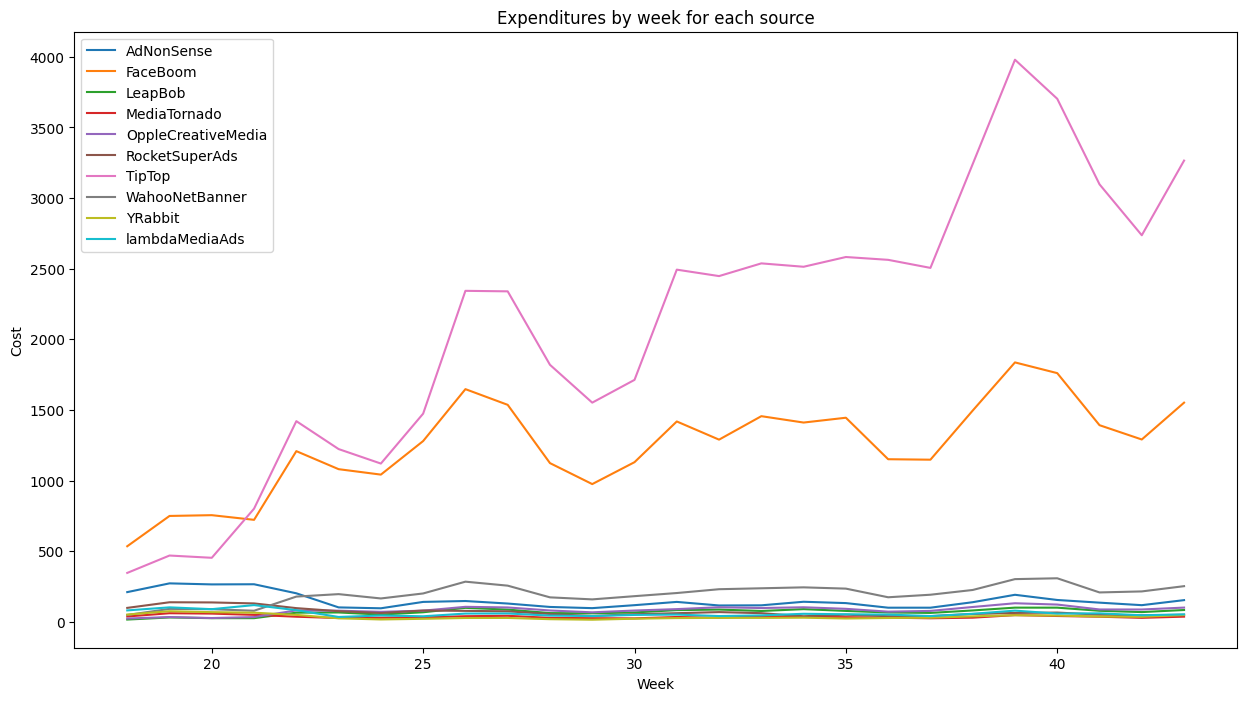

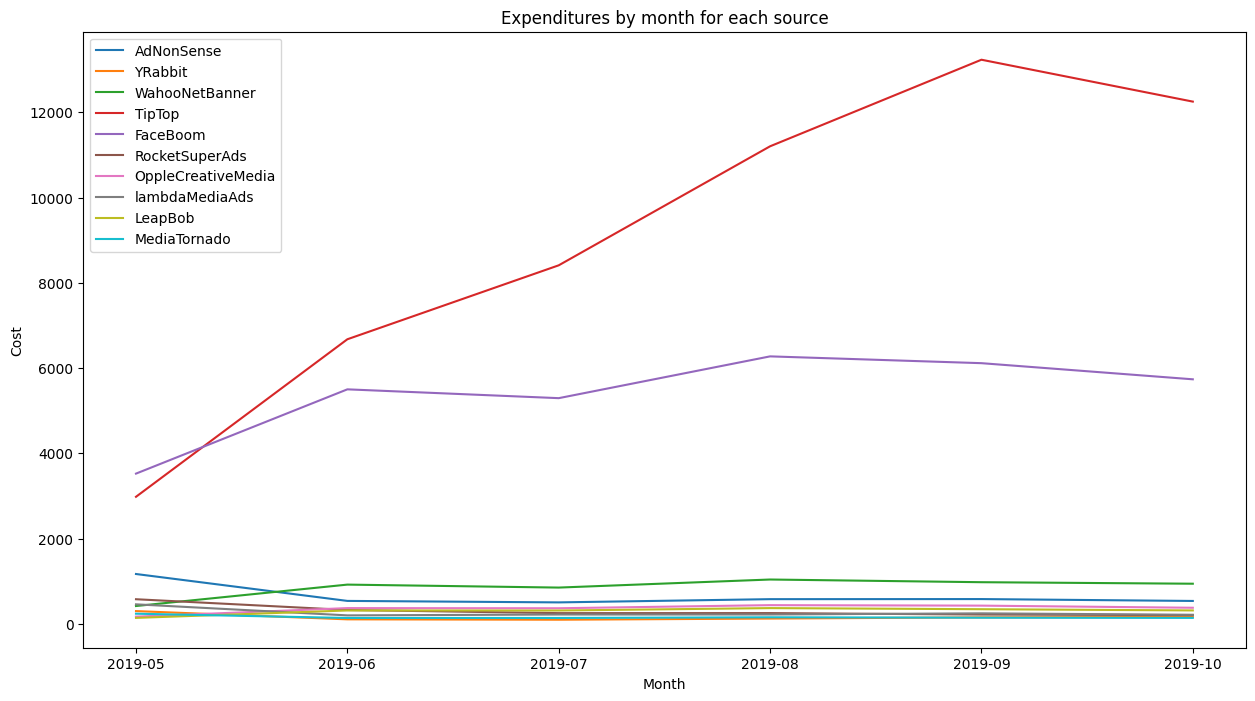

In [17]:
# Convert 'dt' to datetime
costs['dt'] = pd.to_datetime(costs['dt'])

# Extract week and year from 'dt'
costs['week'] = costs['dt'].dt.isocalendar().week
costs['year'] = costs['dt'].dt.isocalendar().year
costs['month_year'] = costs['dt'].dt.to_period('M')

# Group by source, then by week and year, calculate sum of costs
weekly_costs = costs.groupby(['channel', 'year', 'week'])['costs'].sum().reset_index()

monthly_costs = costs.groupby(['channel', 'month_year'])['costs'].sum().reset_index()

plt.figure(figsize=[15,8])

# Iterate over all unique sources and plot lines for each source
for source in weekly_costs['channel'].unique():
    plt.plot(weekly_costs[weekly_costs['channel'] == source]['week'], weekly_costs[weekly_costs['channel'] == source]['costs'], marker='', label=source)

plt.title('Expenditures by week for each source')
plt.xlabel('Week')
plt.ylabel('Cost')
plt.legend()

# Convert 'month_year' to string
monthly_costs['month_year'] = monthly_costs['month_year'].astype(str)
monthly_costs.sort_values('month_year', inplace=True)

plt.figure(figsize=[15,8])

for source in monthly_costs['channel'].unique():
    plt.plot(monthly_costs[monthly_costs['channel'] == source]['month_year'], monthly_costs[monthly_costs['channel'] == source]['costs'], marker='', label=source)

plt.title('Expenditures by month for each source')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.legend()

plt.show()

**Conclusion:**

1. TipTop channel consistently has the highest advertising expenditure across all months compared to other channels. The expenditures on this channel have been increasing every month from May to September but recorded a slight decrease in October.

2. The second highest spending is observed for the FaceBoom channel. Similar, to TipTop, it also shows a continuous increase in advertising expenditure from May to August, but it starts to decrease from September.

3. Advertising expenditures for other channels remain relatively lower and fairly consistent across the examined period with some minor variations. Among these, WahooNetBanner and AdNonSense seem to be the most invested ones.

4. The lowest expenditure amongst all channels is on LeapBob and MediaTornado.

5. Channels like lambdaMediaAds, YRabbit, OppleCreativeMedia and RocketSuperAds, etc., also have minimal and consistent advertising expenditures with no specific trend being observed.

**Let's find out how much it cost on average to attract one user (CAC) from each source. We use user profiles.**

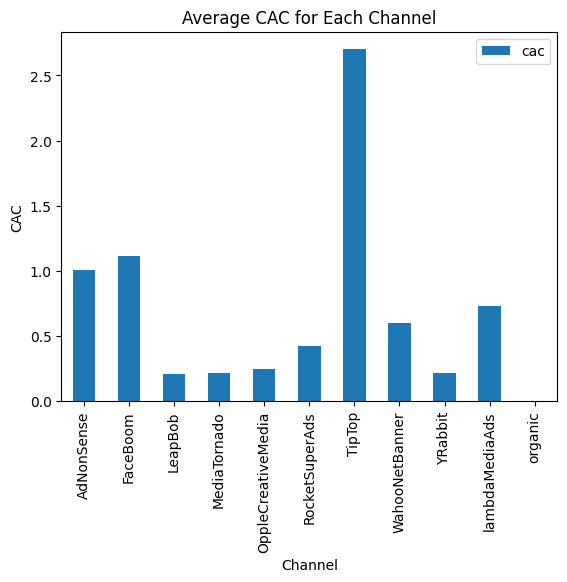

In [18]:
def calculate_metrics(profiles, purchases, observation_date, horizon_days, dimensions=None):
    """
    Function to calculate LTV and ROI.
    """
    if dimensions is None:
        dimensions = ['channel']

    # Filter out users who did not reach the observation horizon
    profiles = profiles.loc[profiles['dt'] <= observation_date]
    
    # Merge user profiles with purchase data
    merged_data = pd.merge(profiles, purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')

    # Calculate lifetime for each purchase
    merged_data['lifetime'] = (merged_data['event_dt'] - merged_data['first_ts']).dt.days

    # Group data with respect to the given dimensions
    grouped_data, user_count = group_by_dimensions(merged_data, dimensions)

    # Calculate CAC (Customer Acquisition Cost)
    cac = merged_data.groupby(dimensions).agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'})

    # Calculate ROI (Return of Investment)
    roi = grouped_data.div(cac['cac'], axis=0)

    return cac, roi


def group_by_dimensions(df, dimensions):
    """
    Function to group data by dimensions and returns cumulative sum of revenue for each group.
    """
    # Creating pivot table of revenue sum for each lifetime and user cohort
    revenue_csum = df.pivot_table(index=dimensions, columns='lifetime', values='revenue', aggfunc='sum').fillna(0).cumsum(axis=1)
    
    # Counting unique users for each cohort
    user_count = df.groupby(dimensions).agg(user_count=('user_id', 'nunique'))

    # Dividing the cumulative sum of revenues by the number of users in each cohort for normalization
    normalized_revenue = revenue_csum.div(user_count['user_count'], axis=0)

    return normalized_revenue, user_count


# Set dimensions
dimensions = ['channel']

# Calculate metrics
cac, roi = calculate_metrics(profiles, orders, observation_date, horizon_days, dimensions)

# Plot CAC for each channel
cac.plot(kind='bar', title='Average CAC for Each Channel', xlabel='Channel', ylabel='CAC')

plt.show()

In [19]:
cac

cac
channel                     
AdNonSense          1.008149
FaceBoom            1.113254
LeapBob             0.210092
MediaTornado        0.219090
OppleCreativeMedia  0.250072
RocketSuperAds      0.425830
TipTop              2.700062
WahooNetBanner      0.600988
YRabbit             0.218692
lambdaMediaAds      0.731293
organic             0.000000

**From the Customer Acquisition Cost (CAC) data per each advertising source, we can infer:**

* `TipTop` has the highest CAC of around 2.70 meaning it costs the highest to acquire a single user from this source. This aligns with our earlier finding where TipTop also had the most expenses.

* `FaceBoom` and `AdNonSense` come next, costing around 1.11 and 1.01 per user respectively.

* `lambdaMediaAds` and `WahooNetBanner` maintain a moderate CAC of around 0.73 and 0.60 respectively.

* The rest of the channels namely `RocketSuperAds`, `OppleCreativeMedia`, `MediaTornado`, `LeapBob`, and `YRabbit` have lower CACs, all being under 0.50.

* The `organic` source has a CAC of 0.00 indicating that these users weren't acquired through paid advertising but rather through unpaid or natural methods.

In conclusion, the most costly users come from the TipTop, FaceBoom, and AdNonSense channels. While lower CACs may seem preferable, it's important to also consider the quality of the users acquired. 

<a id="num6"></a>
## 4. Estimating the return on advertising

**Using the LTV, ROI, and CAC charts, let's analyze the ROI of advertising. Consider that November 1, 2019 is on the calendar, and the business plan stipulates that users should be paid off no later than two weeks after being attracted.**

**Let's analyze the return on advertising with the help of LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.**

In [41]:
# Function for calculating LTV and ROI.
def get_ltv(
profiles,
purchases,
observation_date,
horizon_days,
dimensions=[],
ignore_horizon=False,
):
    # Exclude users who did not “survive” until the horizon of the analysis.
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
        days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Add purchase data to the profiles.
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
        )
    
    # Calculate the user's lifetime for each purchase.
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # Group by cohort if there is nothing in dimensions.
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

        # Function for grouping by desired features.
    def group_by_dimensions(df, dims, horizon_days):
        # Build a "triangular" table of income.
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # Find the sum of revenue with accumulation.
        result = result.fillna(0).cumsum(axis=1)
        # Calculate cohort sizes.
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # Combine cohort sizes and income table.
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # Calculate LTV: divide each "cell" in a row by the cohort size.
        result = result.div(result['cohort_size'], axis=0)
        # Exclude all lifetimes exceeding the analysis horizon.
        result = result[['cohort_size'] + list(range(horizon_days))]
        # Restore cohort sizes.
        result['cohort_size'] = cohort_sizes

        # Collect a dataframe with user data and CAC values, 
        # adding parameters from dimensions.
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # Calculate the average CAC by parameters from dimensions.
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # Calculate ROI: divide LTV by CAC. 
        roi = result.div(cac['cac'], axis=0)

        # Remove rows with infinite ROI.
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # Restore cohort sizes in the ROI table.
        roi['cohort_size'] = cohort_sizes

        # Add CAC to the ROI table.
        roi['cac'] = cac['cac']

        # In the final table, leave the cohort sizes, CAC 
        # and ROI in lifetimes that do not exceed the analysis horizon.
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # Return the LTV and ROI tables.
        return result, roi

    # Get the LTV and ROI tables.
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # For the tables of dynamics, remove 'cohort' from dimensions.
    if 'cohort' in dimensions:
        dimensions = []

    # Get the LTV and ROI dynamics tables.
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # Raw data.
        result_grouped,  # LTV table.
        result_in_time,  # LTV dynamics table.
        roi_grouped,  # ROI table.
        roi_in_time,  # ROI dynamics table.
    )    

In [21]:
# Set the smoothing window.
window = 14

# Function for smoothing the frame.
def filter_data(df, window):
    # Apply moving average for each column.
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

# Find LTV broken down by acquisition channels.

dimensions = ['channel']

ltv_raw, ltv_table, ltv_table_dt, rio_table, rio_table_dt = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

In [22]:
# Function to visualize LTV and ROI.
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # Set grid layout for plotting graphs
    plt.figure(figsize=(15, 20))

    # Exclude cohort sizes from ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # From LTV history table, retain only required lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # Write Acquisition cost in a separate DataFrame
    cac_history = roi_history[['cac']]

    # Exclude cohort sizes & cac from roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # From ROI history table, retain only required lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # First Graph - LTV curves
    ax1 = plt.subplot(5, 1, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # Second Graph - Dynamics of LTV
    ax2 = plt.subplot(5, 1, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('LTV Dynamics of users on Day {}'.format(horizon))
    plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)

    # Third Graph - Dynamics of CAC
    ax3 = plt.subplot(5, 1, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title('Acquisition Cost Dynamics')
    plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)


    # Fourth Graph - ROI curves
    ax4 = plt.subplot(5, 1, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-Even Point')
    plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # Fifth Graph - Dynamics of ROI
    ax5 = plt.subplot(5, 1, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-Even Point')
    plt.xlabel('Acquisition date')
    plt.title('ROI Dynamics on Day {}'.format(horizon))
    plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)

    plt.tight_layout()
    plt.show()

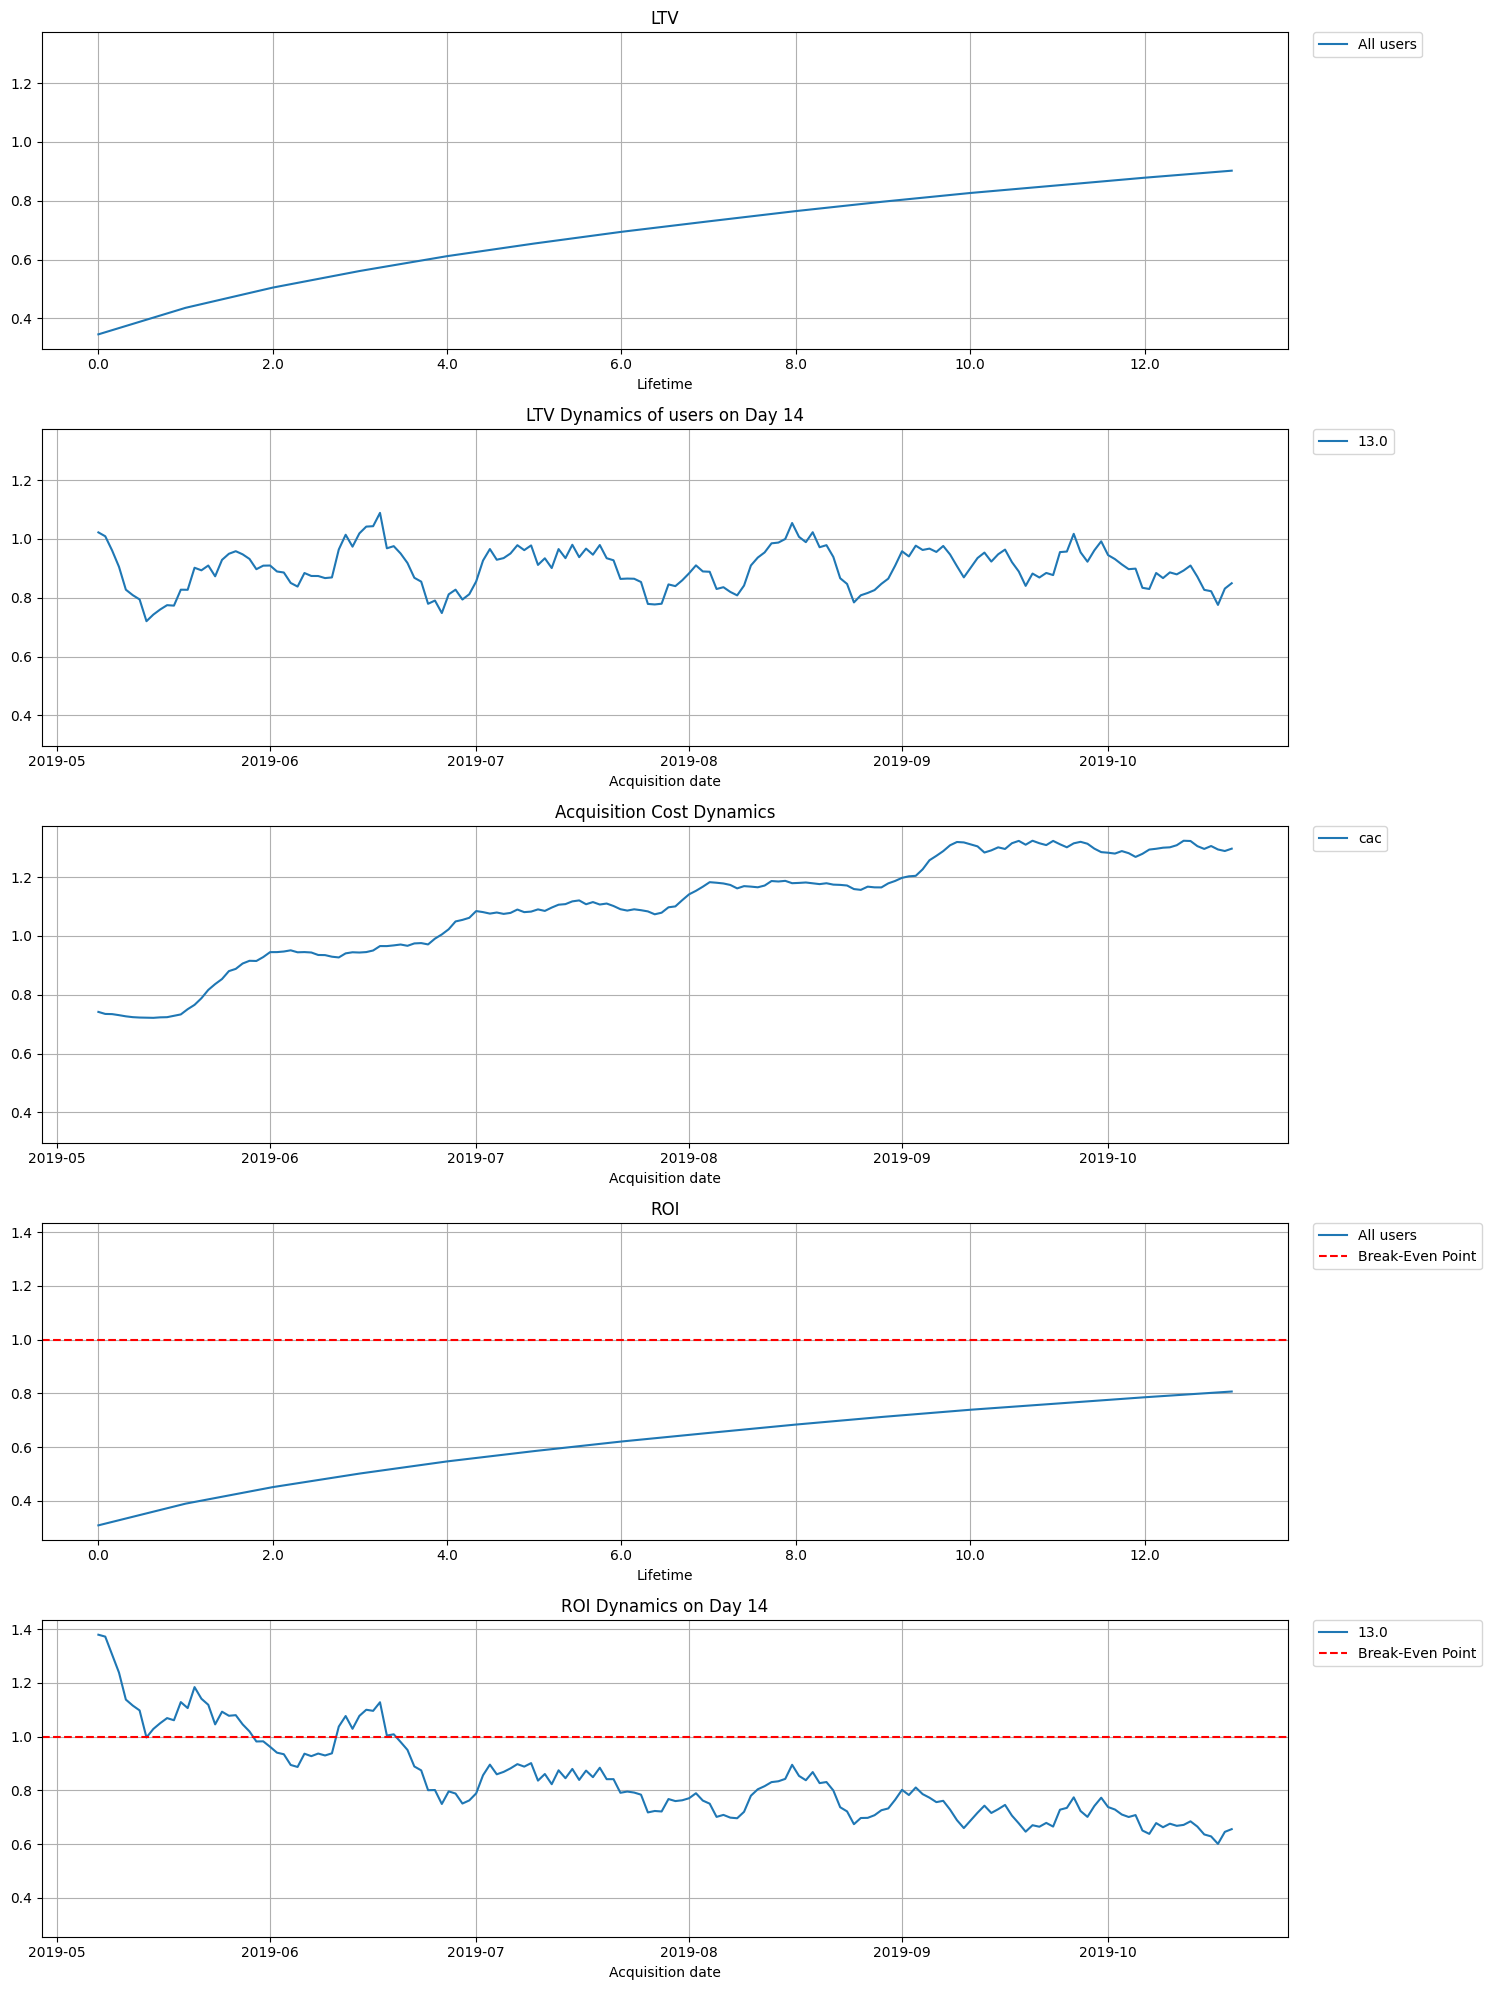

In [23]:
#Exclude the organic users from the table
profiles = profiles.query('channel != "organic"')

#Compute LTV and ROI
ltv_raw, ltv_table, ltv_table_dt, rio_table, rio_table_dt = get_ltv(profiles, orders, observation_date, horizon_days)

#Plot the graphs
plot_ltv_roi(ltv_table, ltv_table_dt, rio_table, rio_table_dt, horizon_days)

**Conclusion:**

* The provided data indicates a growing trend in the lifetime value (LTV) of the customers across different cohorts. This means that on average, the company earns progressively more from their customers over time. The data for LTV dynamics shows how well revenue from users is growing over their lifetime.

* It's observed that the customer acquisition cost (CAC) has increased significantly from 0.74 to almost 1.30, meaning that the company is spending more and more money on attracting each customer. This significant increase in CAC over time could be one of the reasons why the company is losing money.

* Regarding the return on investment (ROI), it shows the effectiveness of marketing efforts over customer lifetime. By the 13th day, the ROI reaches 0.80, which is under than the cost of acquisition (1.11). Ideally, this value should be above 1 to reflect that the earnings from the customer are more than the costs of acquiring them. Consequently, it appears that the company is not able to recover its acquisition costs within this period of time.

**Create and study conversion and retention charts broken down by device, country, advertising channel.**

In [24]:
# This function calculates the conversion rate.
def get_conversion(
profiles,
purchases,
observation_date,
horizon_days,
dimensions=[],
ignore_horizon=False,
):    
    # Excludes users who have not 'survived' until the analysis horizon.
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Defines the date and time of each user's first purchase.
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Adds purchase information to profiles.
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Calculates the lifetime for each purchase.
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # Group by cohort if there is nothing in dimensions.
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # Function to group the table by the desired features.
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # Divide each cell in the row by the cohort size to get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Obtains the conversion rate table.
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # For the conversion dynamics table, remove 'cohort' from dimensions.
    if 'cohort' in dimensions: 
        dimensions = []

    # Obtain the conversion dynamics table.
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Returns both tables and the raw data.
    return result_raw, result_grouped, result_in_time

In [25]:
conversion_raw, conversion, conversion_dt = get_conversion(profiles, orders, observation_date, horizon_days)

In [26]:
# This function is for calculating retention.

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # We add the 'payer' column to the passed dimensions list
    dimensions = ['payer'] + dimensions

    # Exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Collect "raw" data for retention calculation
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # Function for grouping the table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # We get the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # We get the retention dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # We return both tables and raw data
    return result_raw, result_grouped, result_in_time


In [27]:
retention_raw, retention, retention_dt = get_retention(profiles, visits, observation_date, horizon_days)

In [28]:
# This function is for visualizing retention

def plot_retention(retention, retention_history, horizon, window=7):
    # Setting the grid size for the plots
    plt.figure(figsize=(15, 10))

    # Exclude cohort sizes and day-1 retention
    retention = retention.drop(columns=['cohort_size', 0])
    # From retention history, retain only required lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # If retention table index consists of only 'payer',
    # we add a second feature - 'cohort'
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # In the plot table, there are two rows and two columns hence there are four cells
    # First cell is for plotting retention curves of paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend() 
    plt.xlabel('Lifetime')
    plt.title('Retention of Paying Users')

    # The second cell is for plotting retention curves of non-paying users
    # The vertical axis is from the plot in the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Non-Paying Users')

    # The third cell is for plotting the retention dynamics of paying users
    ax3 = plt.subplot(2, 2, 3)
    # Get column names for pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # Filter data and plot
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title(
        'Retention Dynamics of Paying Users on Day {}'.format(
            horizon
        )
    )

    # The fourth cell is for plotting the retaining dynamics of non-paying users
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # Filter data and plot
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition Date')
    plt.title(
        'Retention Dynamics of Non-Paying Users on Day {}'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

In [29]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):
    # Setting the grid size for the plots
    plt.figure(figsize=(15, 5))

    # Exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # From conversion history, retain only required lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # First Graph - User Conversion Curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User Conversion')

    # Second Graph - Conversion Dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # Columns of pivot table will be all index columns except for date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title('Conversion Dynamics on Day {}'.format(horizon))

    plt.tight_layout()
    plt.show()

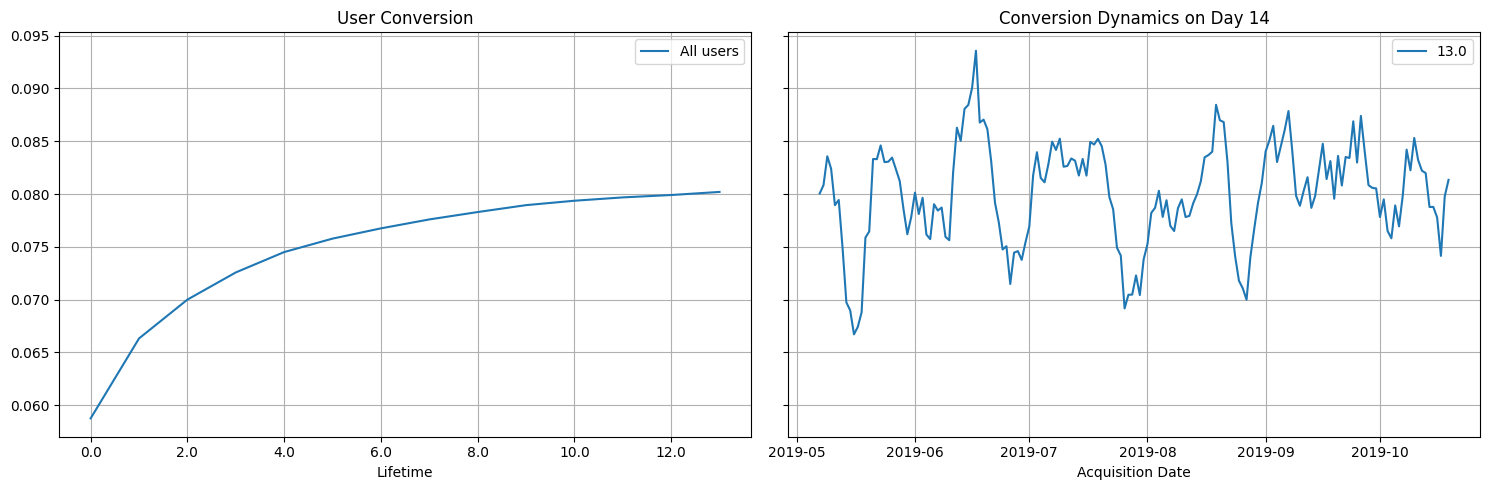

In [30]:
# We plot user conversion and its dynamics on day 14.
plot_conversion(conversion, conversion_dt, horizon_days)

**The data suggests two main trends:**

* User Conversion Over Time: User conversion seems to be slowly but steadily increasing over time. This is illustrated by both the higher average conversion rates on recent dates, such as 0.086735 on 2019-10-19 compared to rates as low as 0.058752 on 'Day 0'. The consistent increase in conversion rate suggests that users tend to convert more as they use the app over time.

* Conversion Rate Variability: The conversion rate data shows a significant variability in daily rates. For example, on 2019-05-05, the conversion rate was only 0.052511 compared to 0.091904 on 2019-05-04. The varying rates may be attributed to factors such as marketing efforts, user behavior, features of the app, or external factors.

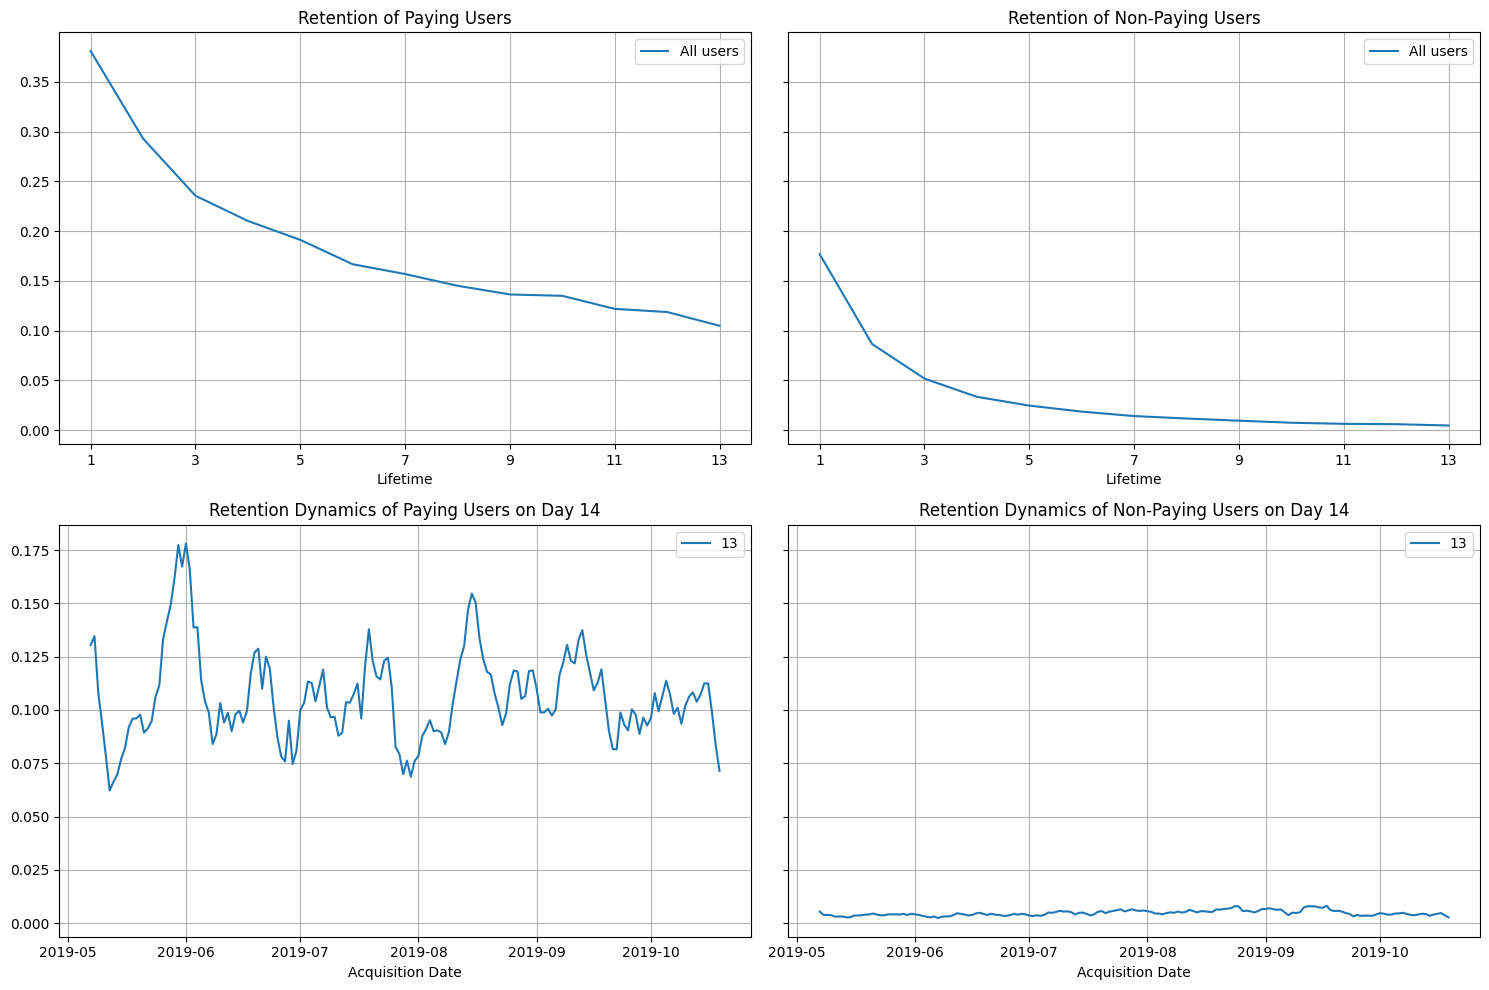

In [31]:
# Construct user retention graphs.
plot_retention(retention, retention_dt, horizon_days)

**Conclusions:**

The data shows high attrition rates for both paying and non-paying users. However, paying users demonstrate a markedly better retention rate.

* Paying Vs Non-Paying User Retention: The data reveals that paying users tend to stick around longer than non-paying users. It seems after day 1, paying users have a much higher retention rate (around 38%) compared to non-paying users (around 18%). This trend generally continues throughout the entire period with paying users always having a significantly higher retention rate than the non-paying ones.

* Decrease Over Time: Despite the difference in retention rates between paying and non-paying users, both groups experience a decrease in retention over time. The retention percentage of paying users decreases from 38% on day 1 to about 10.5% on day 13. Similarly, non-paying users retention drops from around 18% to 0.5% on the same time period.

* Day 14 Retention: By day 14, the retention for paying users varies between 9.3% and 14.7%, whereas non-paying users demonstrate significantly lesser retention, with rates oscillating between 0 and 1.4%.

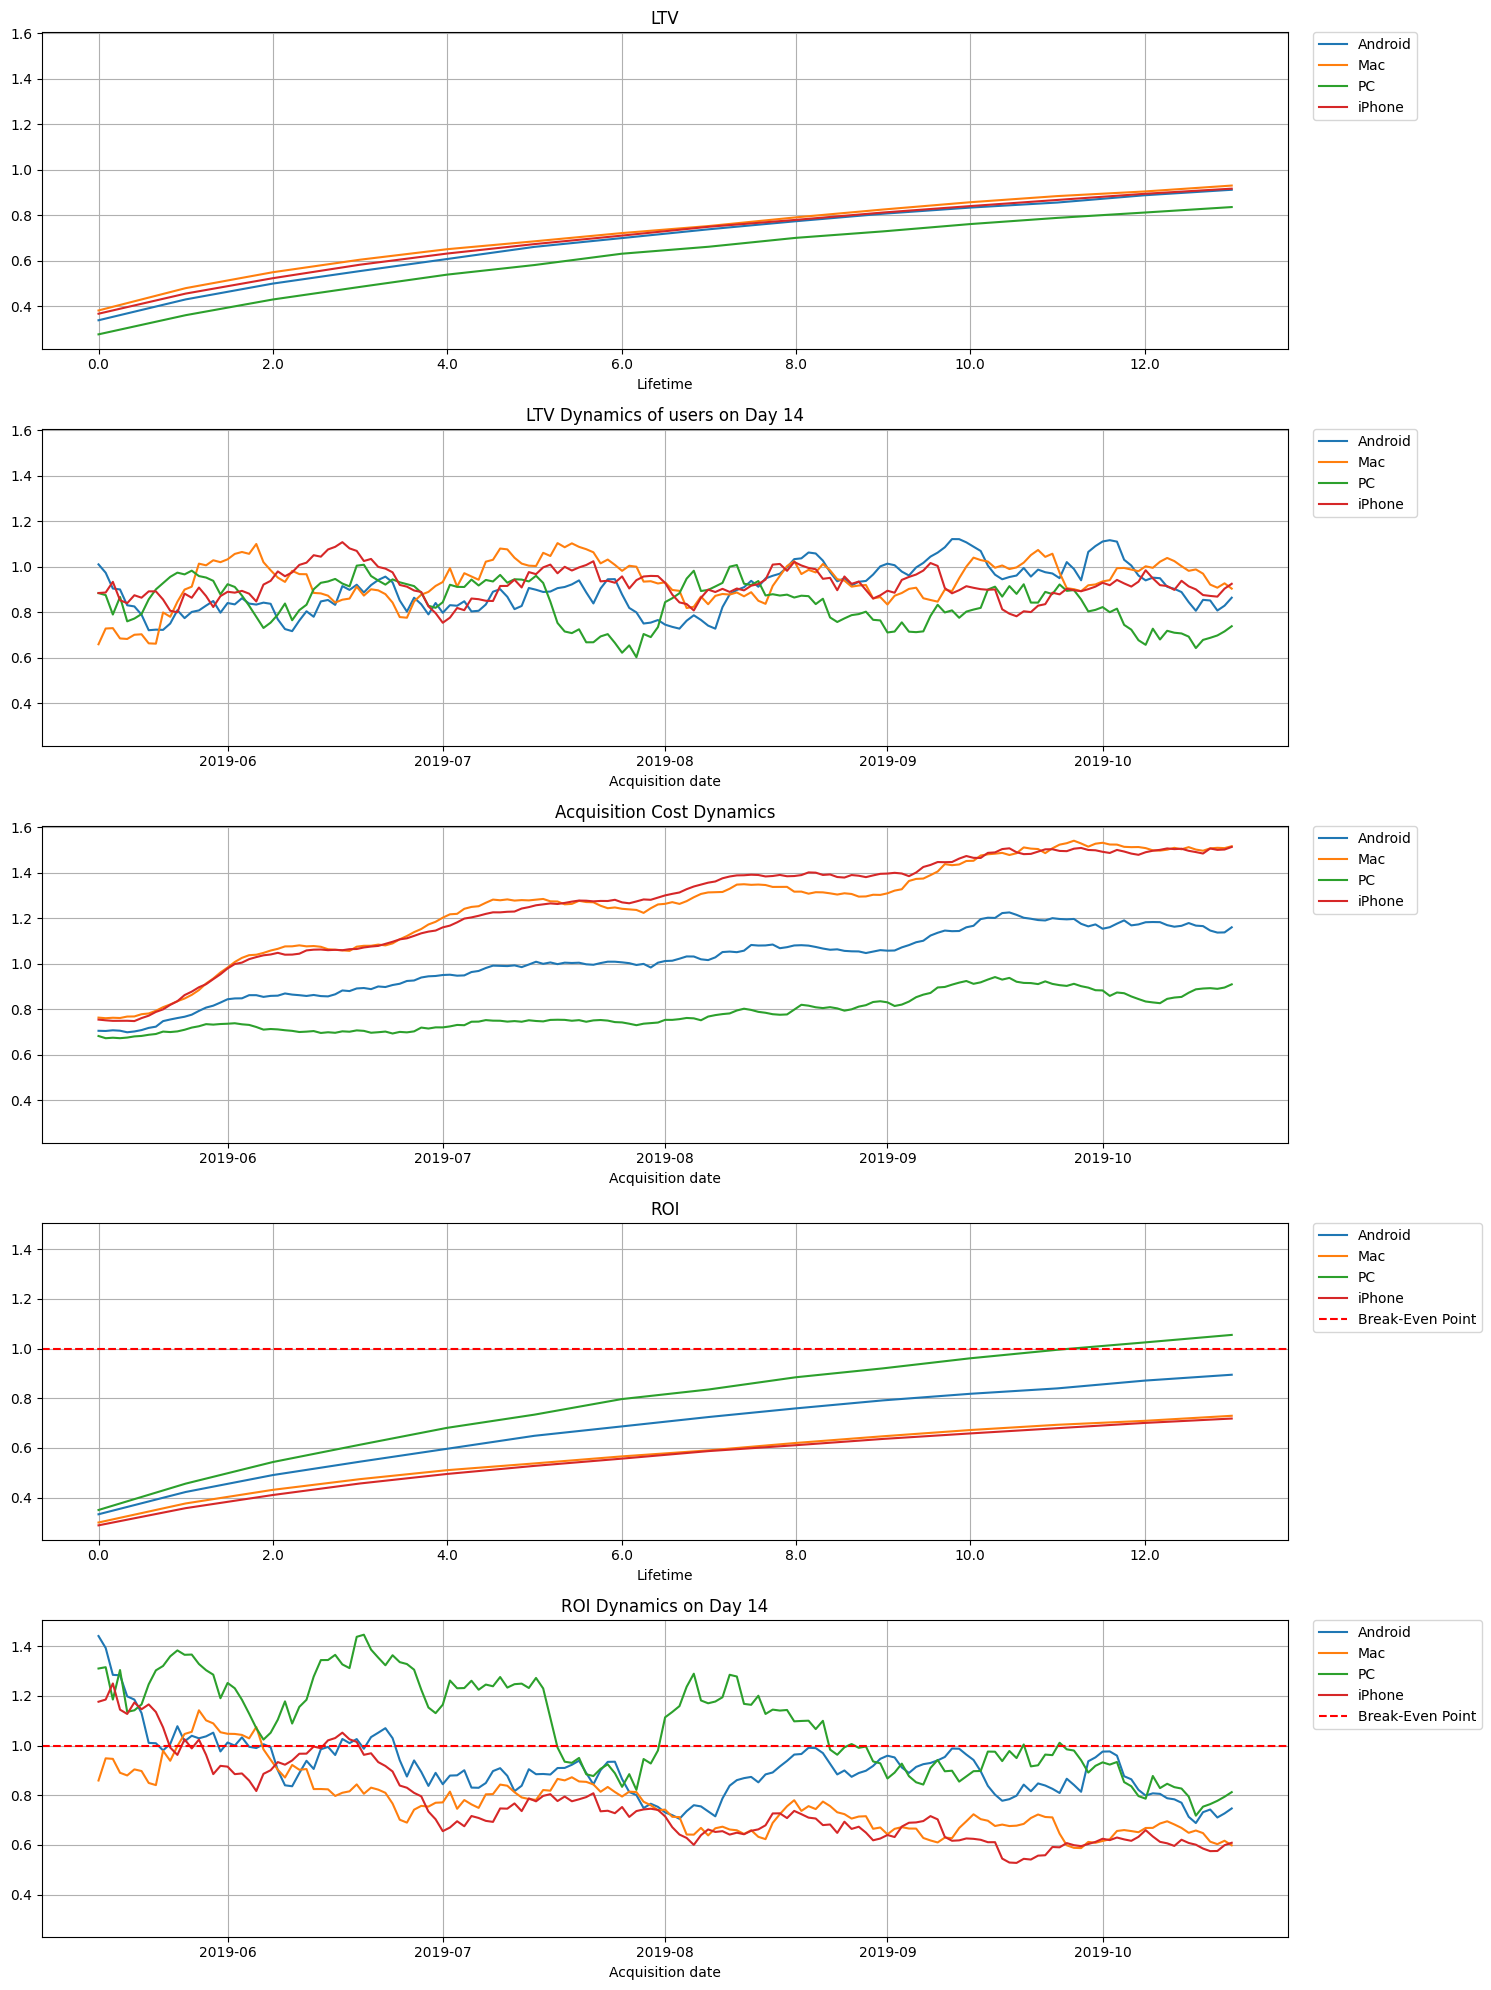

In [32]:
# Analyze ad ROI by device.
dimensions = ['device']

# Calculate LTV and ROI.
ltv_raw, ltv_table, ltv_table_dt, rio_table, rio_table_dt = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# Charting.
plot_ltv_roi(ltv_table, ltv_table_dt, rio_table, rio_table_dt, horizon_days, window=14)

**The data indicates the following:**

1. iPhone users form the largest cohort size when compared to Android, Mac and PC. Despite this, the Customer Acquisition Cost (CAC) values indicate that advertising spending directed towards iPhone users is very similar to that spent on acquiring Mac users. Android has the lowest acquisition cost.

2. Across all devices, the LTV (Customer Lifetime Value) over time increases steadily, indicating that users tend to spend more money as they remain users for longer periods.

3. Mac users, on average, have the highest LTV, however, contributed to the higher acquisition cost.

4. Even though the acquisition costs for Mac and iPhone users are almost the same, Mac users show a higher lifetime value compared to iPhone users. This fact highlights the necessity to optimize ad budget spending between these devices.

5. PCs have the lowest cost of acquisition while having a steadily increasing LTV over time, suggesting that advertising on PCs might be the most cost-efficient.

6. ROI (Return on Investment) over time for Android and PC increase more rapidly than for other devices and are also higher overall for the same period.

Based on the acquisition costs and LTV, it appears that advertising on PC delivers a better ROI than the other platforms. Also worth considering a redistribution of the advertising budget between Mac and iPhone towards Android and PC, which shows higher ROI.

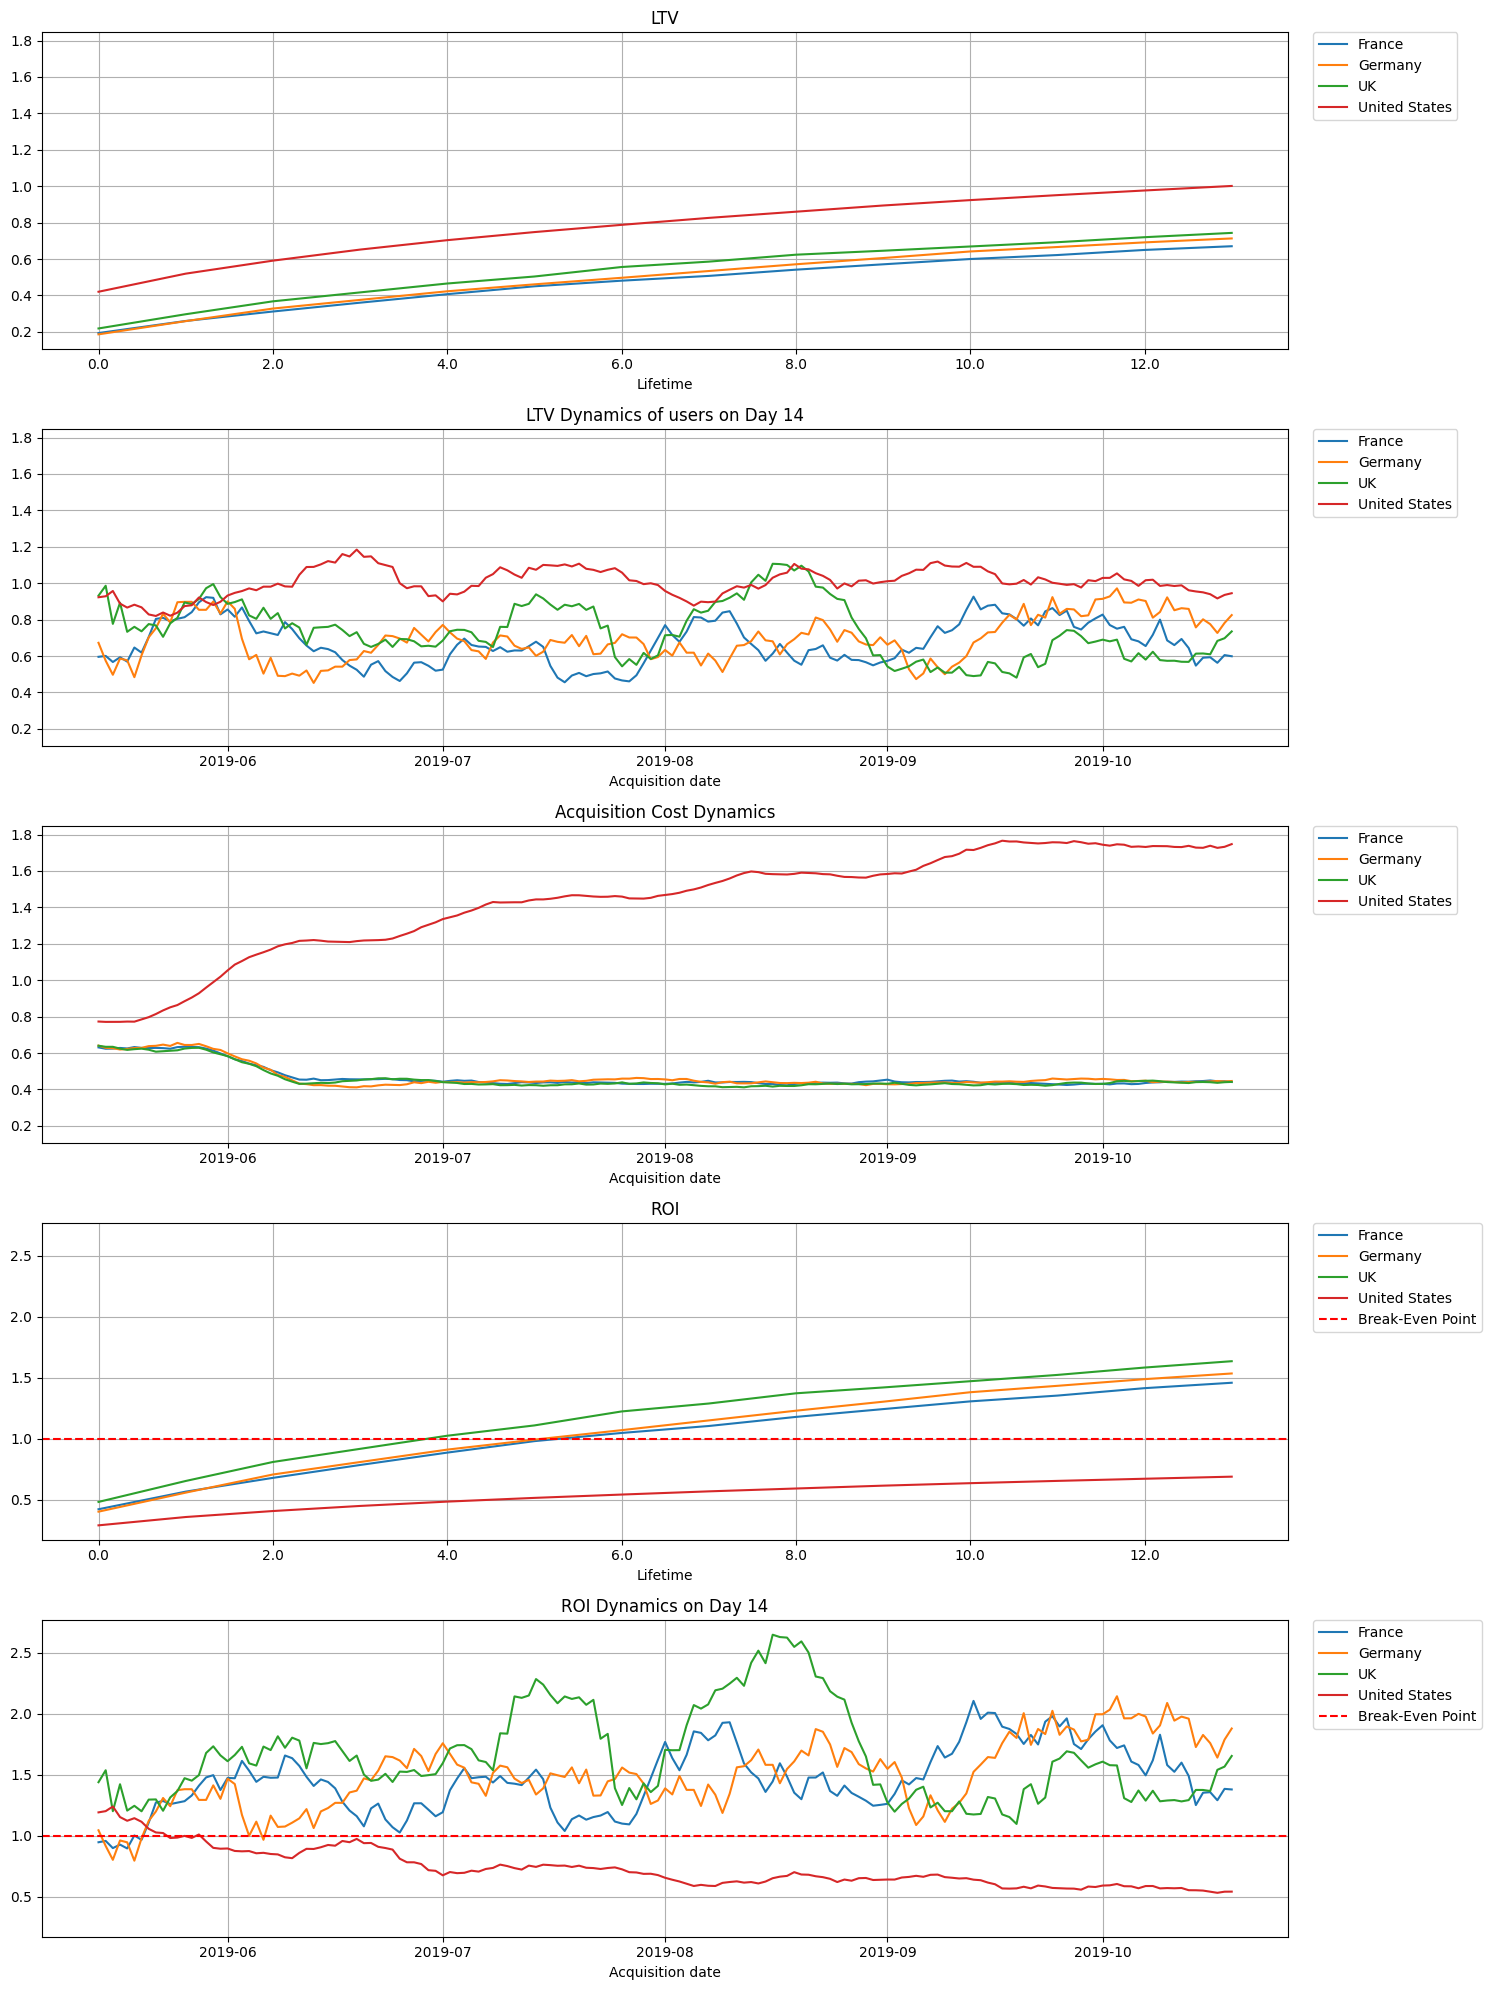

In [33]:
# Advertising ROI analysis by country.
dimensions = ['region']

# Calculate LTV and ROI.
ltv_raw, ltv_table, ltv_table_dt, rio_table, rio_table_dt = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# Plot.
plot_ltv_roi(ltv_table, ltv_table_dt, rio_table, rio_table_dt, horizon_days, window=14)

**Conclusion:**

1. LTV is increasing on average, but US users are doing best.
2. Users' LTV dynamics on day 14 are on average stable for all users in the 4 regions, but noticeably higher than the value for US users.
3. The graph of user acquisition cost dynamics shows that the highest costs are for US users and they are increasing over time, for other regions they are lower and decreasing over time.
4. The ROI graph shows that all regions except USA are paying off.
5. The ROI graph in the user dynamics on day 14 shows that US users stop paying off over time as the cost of attracting users increases, unlike other countries.

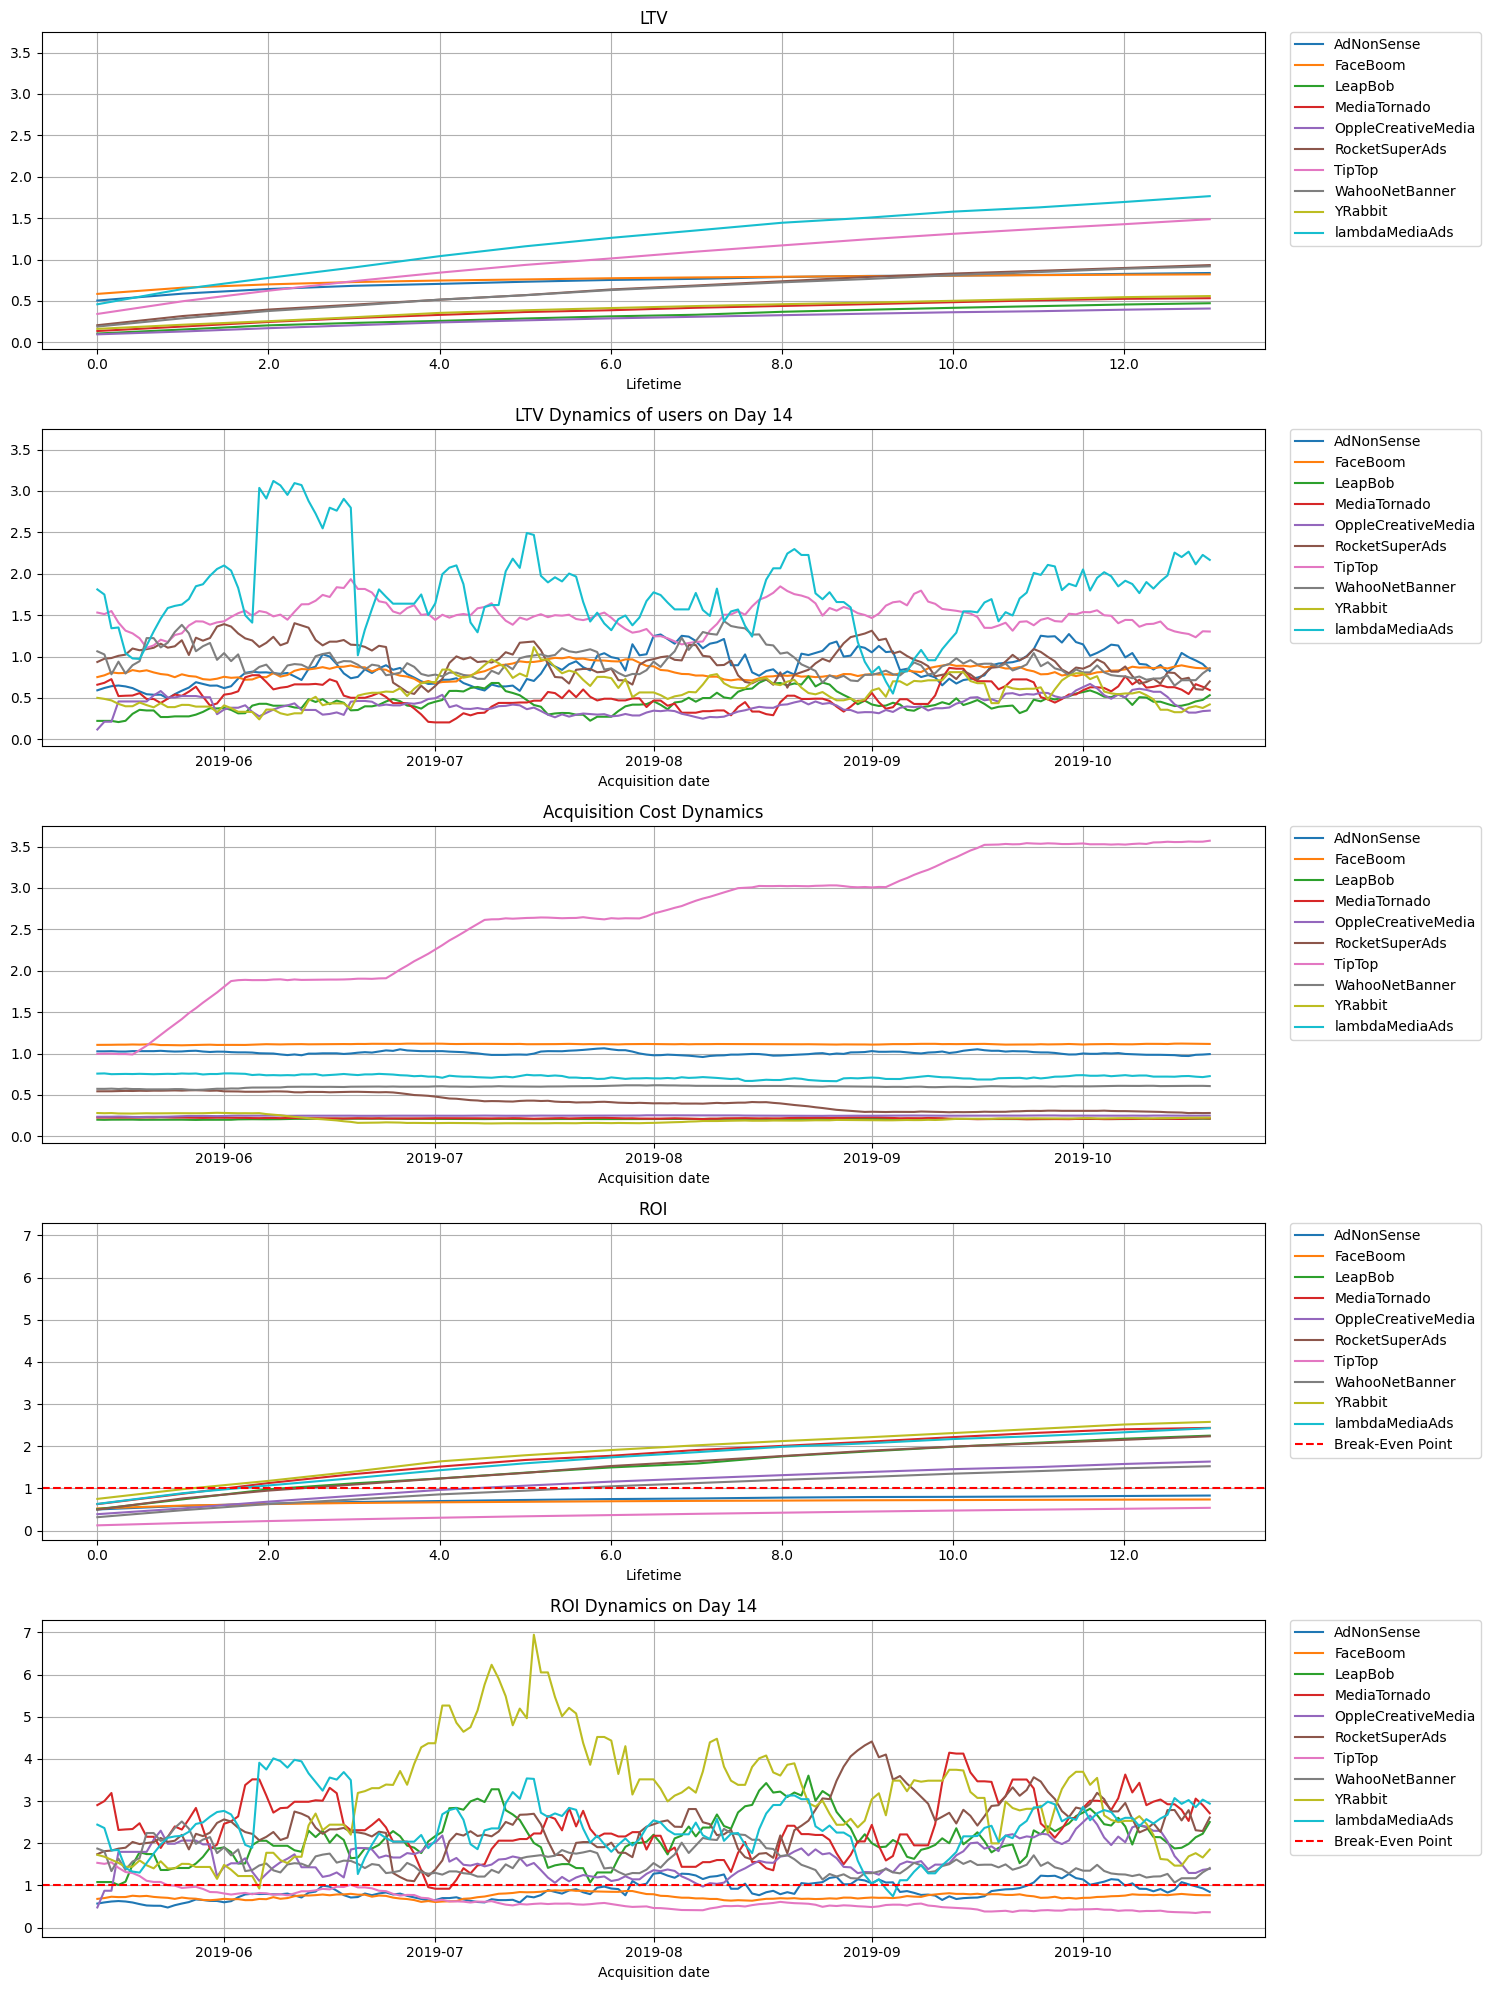

In [34]:
# Advertising ROI analysis by advertising channel.
dimensions = ['channel']

# Calculate LTV and ROI.
ltv_raw, ltv_table, ltv_table_dt, rio_table, rio_table_dt = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# Plot.
plot_ltv_roi(ltv_table, ltv_table_dt, rio_table, rio_table_dt, horizon_days, window=14)

**Conclusion:**

1. LTV grows on average, but lambdaMediaAds and TipTop channels are the best.
2. The dynamics of LTV of users on the 14th day is stable on average for all channels, but it is noticeably higher for lambdaMediaAds and TipTop channels.
3. According to the graph of the dynamics of the cost of attracting users, we can see that the highest costs are incurred by the TipTop channel and they grow over time.
4. The ROI graph shows that all channels except TipTop, FaceBoom pay off. The YRabbit channel has the best ROI.
5. The ROI graph in user dynamics on day 14 shows that TipTop, FaceBoom and AdNonSense channels stop paying off over time as the cost of attracting users for the TipTop channel increases.

**Conversion and retention analysis by country, device, channel**

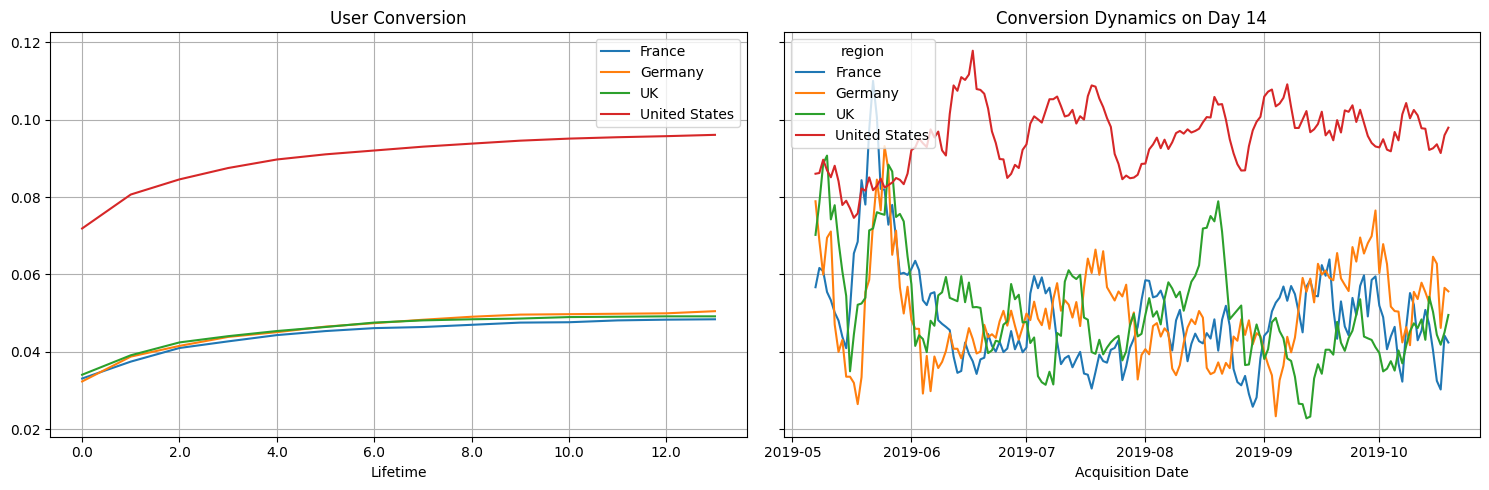

In [35]:
# Conversion by region.
dimensions = ['region']
conversion_raw, conversion, conversion_dt = get_conversion(profiles, 
orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion, conversion_dt, horizon_days)

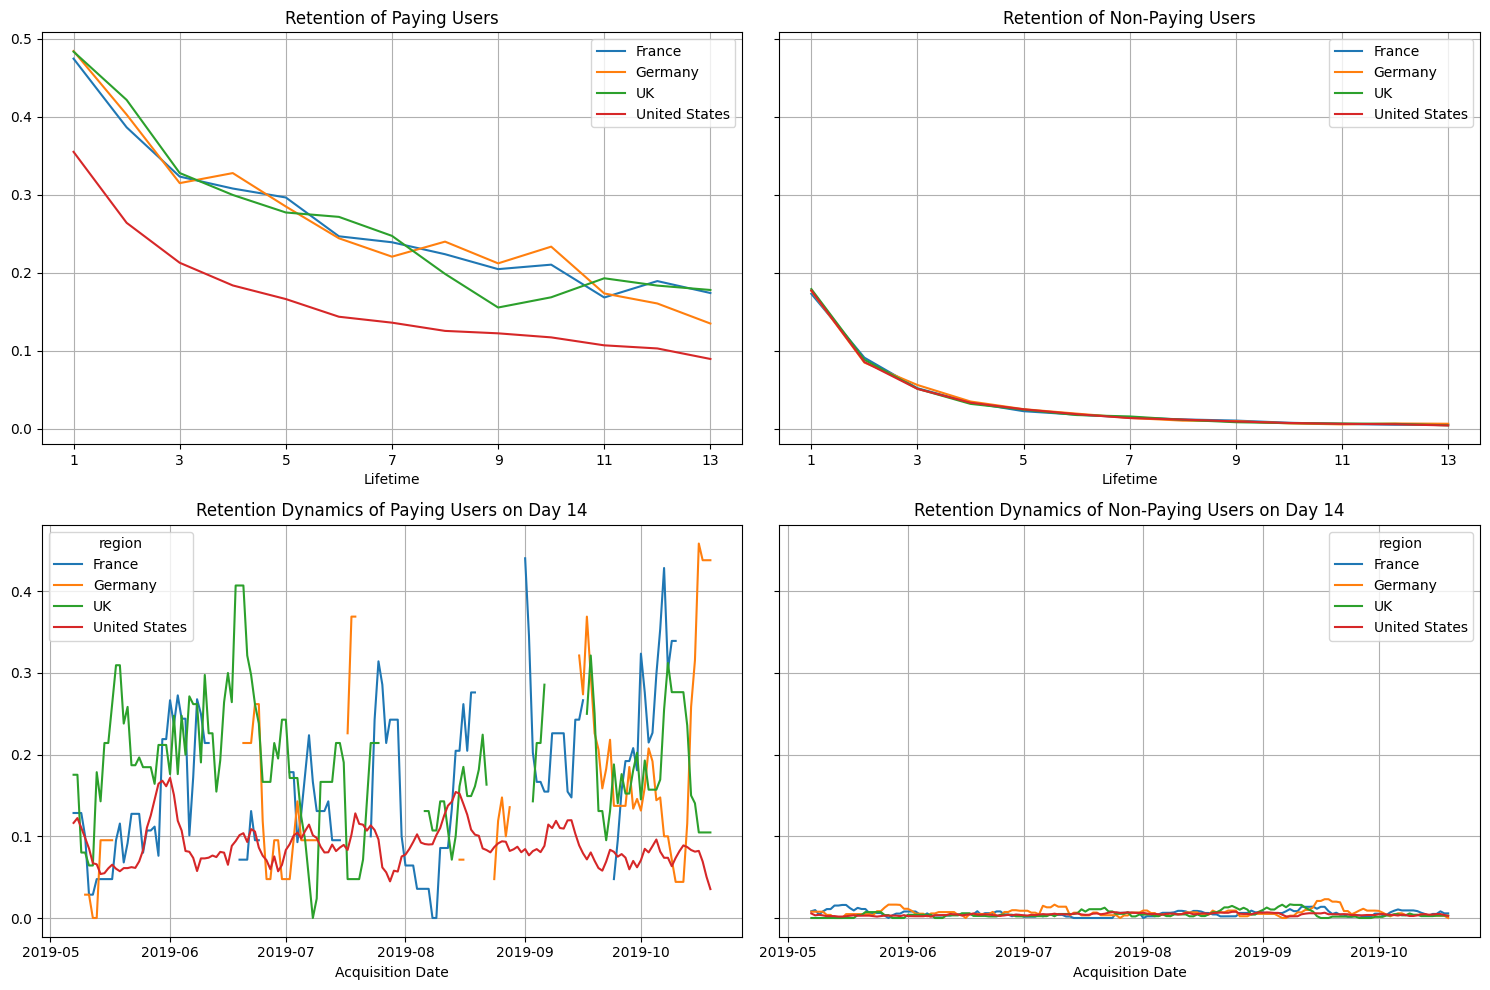

In [36]:
# Retention by region.
dimensions = ['region']
retention_raw, retention, retention_dt = get_retention(profiles, 
visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention, retention_dt, horizon_days)

**Conclusion:**

The graphs show that retention of paying users is lowest in the US, although user conversion in this country is almost 2x higher compared to other countries.

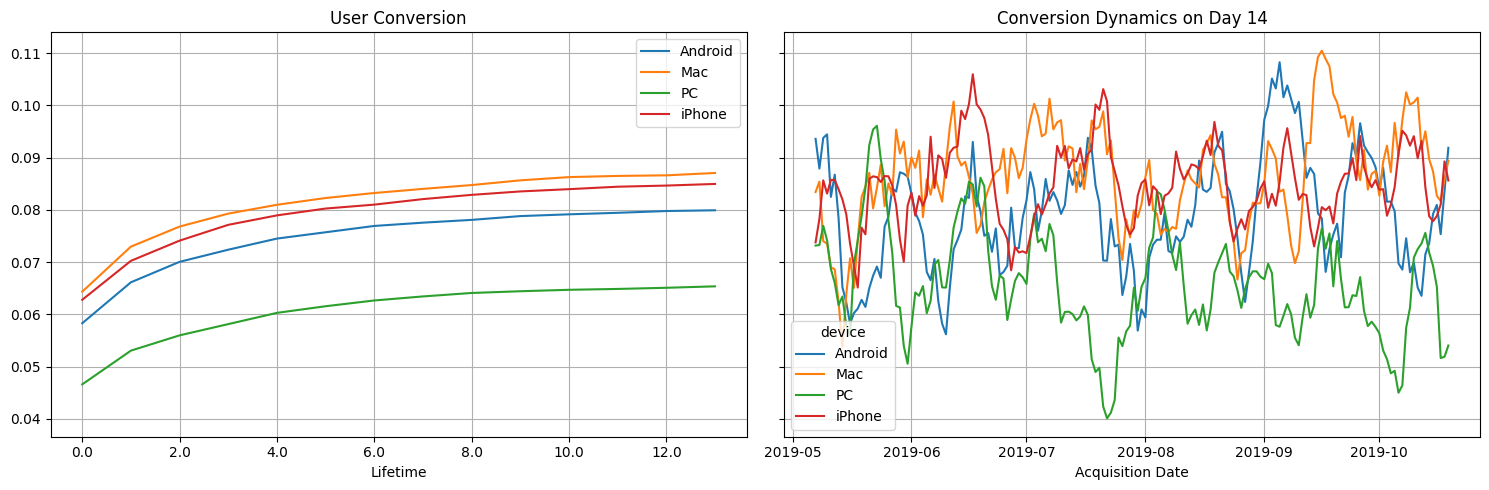

In [37]:
# Conversion by device.
dimensions = ['device']
conversion_raw, conversion, conversion_dt = get_conversion(profiles, 
orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion, conversion_dt, horizon_days)

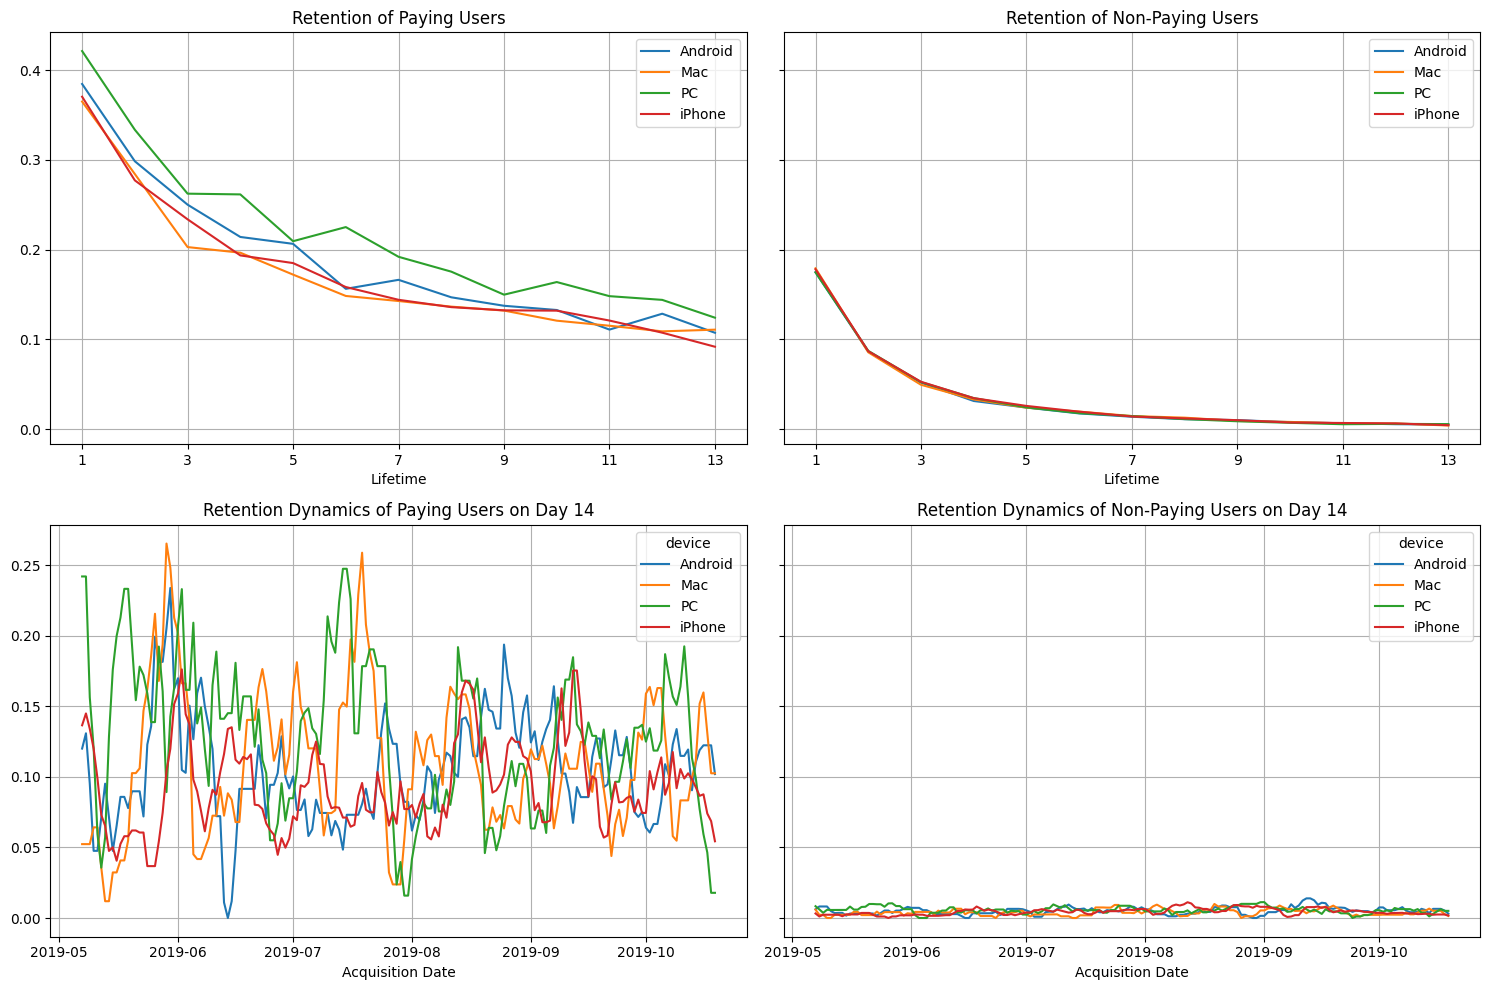

In [38]:
# Retention by device.
dimensions = ['device']
retention_raw, retention, retention_dt = get_retention(profiles, 
visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention, retention_dt, horizon_days)

**Conclusion:**

Retention of paying users using the app from MS is better than from other devices, but conversion of such users is the lowest. User conversion is best from Macs and iPhones.

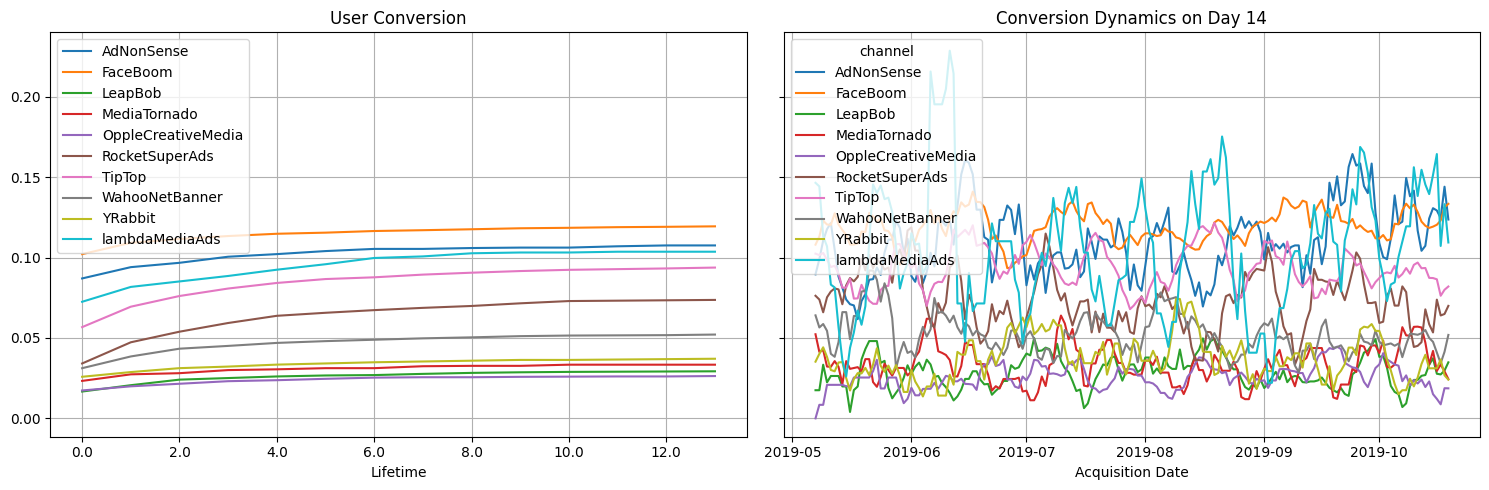

In [39]:
# Conversion by channel.
dimensions = ['channel']
conversion_raw, conversion, conversion_dt = get_conversion(profiles, 
orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion, conversion_dt, horizon_days)

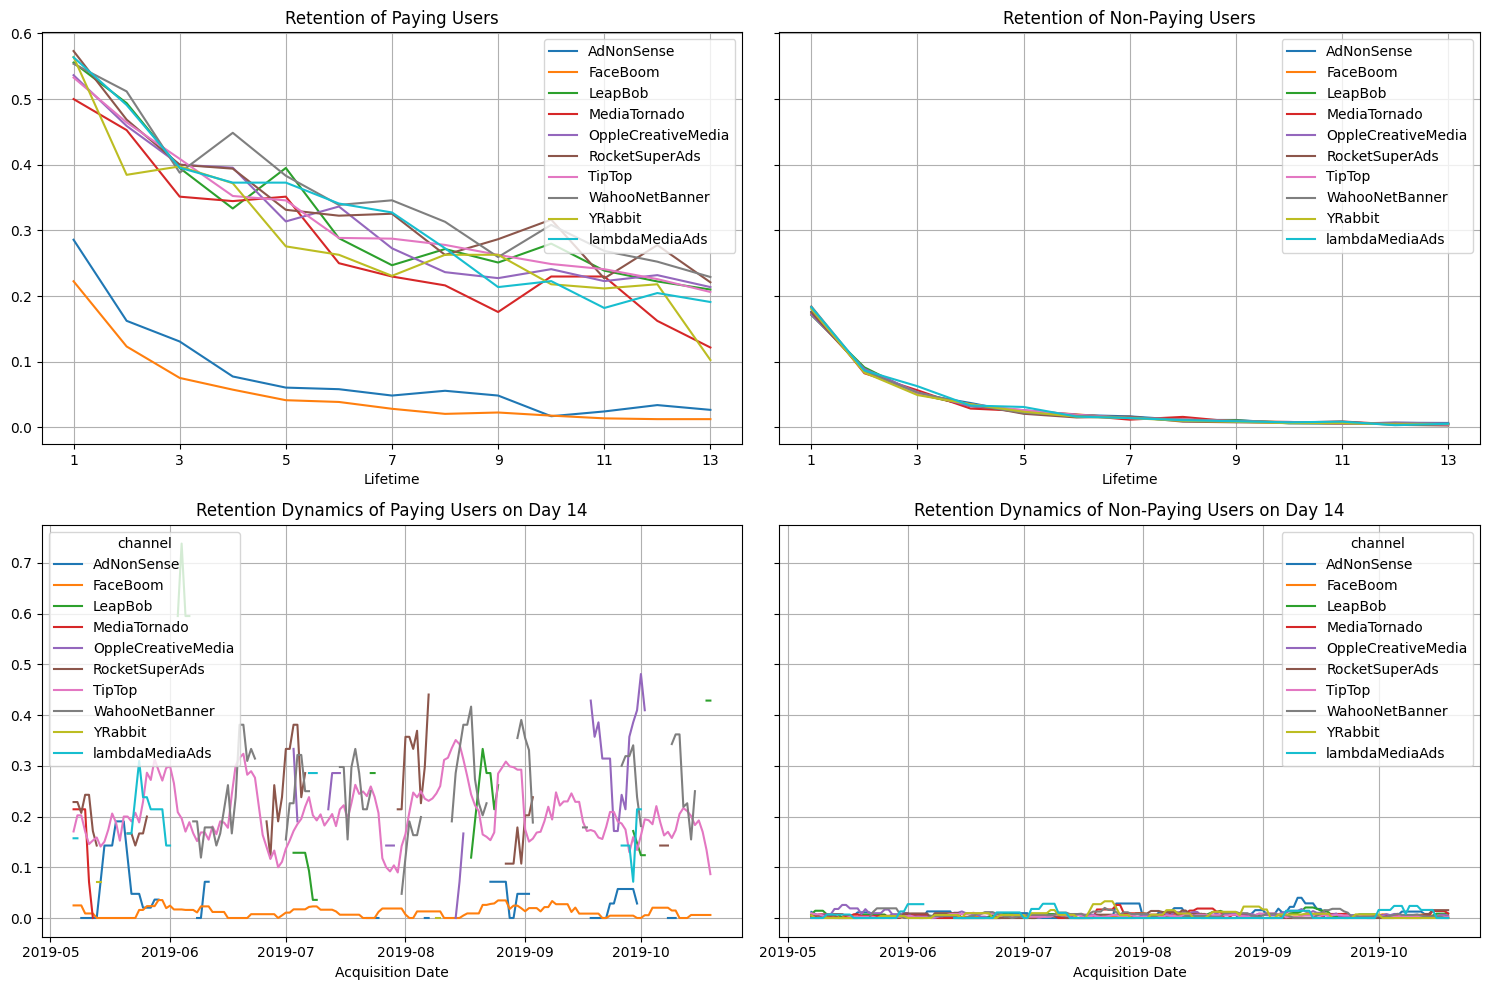

In [40]:
# Retention by channel.
dimensions = ['channel']
retention_raw, retention, retention_dt = get_retention(profiles, 
visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention, retention_dt, horizon_days)

**Conclusion:**

OppleCreativeMedia and LeapBob channels have the lowest conversion of paying users, but their retention dynamics are generally good. FaceBoom and AdNoneSense channels have the best conversion rate, but they have the lowest retention of paying users.

**General conclusion**

For the analyzed period, it was found that advertising aimed at attracting users in general did not pay off.

Analyzing countries it was found that the US is the only country that does not pay off and only increases user acquisition costs.

Analyzing the customer acquisition channels it was found that the TipTop channel has a negative impact on advertising ROI.

Payback problems may be caused by over-investment in TipTop and FaceBoom advertising channels.

<a id="num7"></a>
## 5. General conclusions

**Conclusions:**

The study analyzed data from the ole users of the Procrastinate Pro+ app. The data consisted of users from the countries of the UK, France, Germany, and the US. The highest number of paying users is from US residents with 6902. Among the analyzed devices used by the users, the iPhone accounted for the highest number of paying users with 3,382. It was found that channels like TipTop and FaceBoom have the highest user engagement spend. Also, the TipTop channel only saw an increase in spend over time. 

Overall, user acquisition advertising did not pay off during the analyzed period. The cost and ROI analysis by country, device, and channel showed that excessive user acquisition costs were the cause of the problems found. Advertising costs need to be optimized.

The main reason for not paying off is an ineffective advertising campaign in the USA. Ineffective TipTop and FaceBoom are used as the main advertising channels there (these channels are not used in Europe). TipTop does not pay off due to high advertising costs and FaceBoom due to low user retention. 
    
Apple device users have lower ROI and retention rates precisely because these devices are mostly used in the US. As we've seen, users of these devices don't appear to fare any worse than users of other devices in European countries. 
    
That said, there are also channels with good ROI in the US. The other three channels used in the country pay off on the second or third day. So we should reconsider our choice of advertising channels in the US.

**Recommendations for the marketing department:**

Pay attention to users who use PCs and users from countries other than the US. Stop using the TipTop channel to attract users.

The lambdaMediaAds, RocketSuperAds, WahooNetBanner channels have positive conversion, retention and ROI rates. It's worth considering them as a replacement for channels that don't pay off.